In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## PLEASE GO THROUGH THE INITIAL PREPROCESSING FIRST BEFORE CONTINUING

In [ ]:
df_og= pd.read_csv("/content/drive/MyDrive/Health Insurance Analysis and predictions/Health_insurance.csv")
df = df_og.copy()

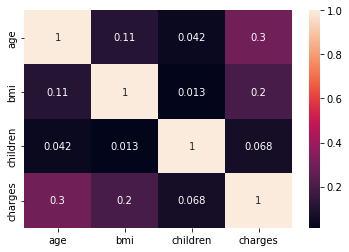

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df["children"] = df["children"].astype(object)

In [ ]:
sex_le = LabelEncoder()
df['sex'] = sex_le.fit_transform(df['sex'])

smoker_le = LabelEncoder()
df['smoker'] = smoker_le.fit_transform(df['smoker'])

region_le = LabelEncoder()
df['region'] = region_le.fit_transform(df['region'])

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
sex_map = dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_)))
print(sex_map)
smoker_map = dict(zip(smoker_le.classes_, smoker_le.transform(smoker_le.classes_)))
print(smoker_map)
region_map = dict(zip(region_le.classes_, region_le.transform(region_le.classes_)))
print(region_map)

{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [ ]:
df.info()
## some categorical columns like region, sex, etc are now treated as numerical ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
df["sex"] = df["sex"].astype(object)
df["smoker"] = df["smoker"].astype(object)
df["region"] = df["region"].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [ ]:
train = df.drop(['charges'], axis = 1)
test = df['charges']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size = 0.2, random_state = 0)

In [ ]:
## Feature scaling by Standardization

sscaler = StandardScaler()
X_train = sscaler.fit_transform(X_train.astype(float))
X_test = sscaler.transform(X_test.astype(float))

In [ ]:
rf = RandomForestRegressor(
    n_estimators = 100,
    criterion = 'squared_error',
    max_depth = 10,
    min_samples_leaf = 4,
    random_state = 1,
    n_jobs = -1
)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_jobs=-1,
                      random_state=1)

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
print("Random Forest reg base estimator: {}".format(rf.base_estimator_))
print("Random Forest reg estimators: {}".format(rf.estimators_))
print("Random Forest reg feature importances: {}".format(rf.feature_importances_))
print("\n")
print("Random Forest reg train set accuracy score: {}".format(rf.score(X_train, Y_train)))
print("\n")
print("Random Forest reg test set accuracy score: {}".format(rf.score(X_test, Y_test)))
print("\n")
print(f"RMSE for train set = {np.sqrt(mean_squared_error(Y_train, y_train_pred))}")
print("\n")
print(f"RMSE for test set = {np.sqrt(mean_squared_error(Y_test, y_test_pred))}")

Random Forest reg base estimator: DecisionTreeRegressor()
Random Forest reg estimators: [DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      random_state=1791095845), DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      random_state=2135392491), DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      random_state=946286476), DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      random_state=1857819720), DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      random_state=491263), DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      random_state=550290313), DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      random_state=1298508491), DecisionTreeRegressor(max_depth=10, max_fe

Random Forest works better than Individual Decision trees as it uses the ensemble learning technique to reduce overfitting

In [ ]:
residuals = Y_test - y_test_pred

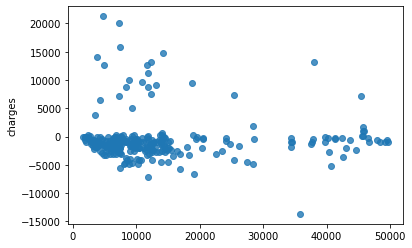

In [ ]:
sns.regplot(x =  y_test_pred, y= residuals, scatter = True, fit_reg= False)

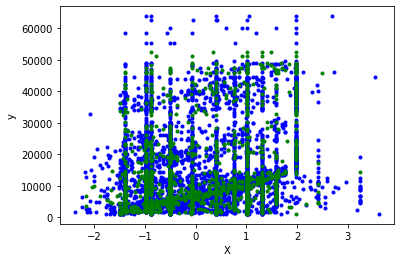

In [ ]:
# plt.plot(X_test, y_test_pred , "r-", linewidth=2, label="Predictions")
plt.plot(X_train, Y_train, "b.",label='Training points')
plt.plot(X_test, Y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.show()